In [104]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [105]:
# pandas provide 2 kinds of dtastructures--
# 1-d and 2-D
# 1-D is called Series and 2-D is called as DataFrame

In [106]:
s=pd.Series([10,20,30,40,50],index=["a","b","c","d","e"])
print(s)
print(s[0])
print(s["a"])

a    10
b    20
c    30
d    40
e    50
dtype: int64
10
10


In [107]:
n=["Harry","Potter","Tom","Jerry"]
s=pd.Series(n)
print(s)

0     Harry
1    Potter
2       Tom
3     Jerry
dtype: object


In [108]:
d=pd.DataFrame(n)
print(d)

        0
0   Harry
1  Potter
2     Tom
3   Jerry


In [109]:
# 1st way -----------
n=[
    ["Harry",89,90],
    ["Potter",79,80],
    ["Tom",90,89],
    ["Jerry",89,78]
]
d=pd.DataFrame(n,columns=["Name","Python","ML"])
d

,Name,Python,ML
0,Harry,89,90
1,Potter,79,80
2,Tom,90,89
3,Jerry,89,78


In [110]:
# 2nd way---
dc={
    "Name":["Harry","Potter","Tom","Jerry"],
    "Python":[89,79,90,89],
    "ML":[90,80,89,78]
}
df=pd.DataFrame(dc)
df

,Name,Python,ML
0,Harry,89,90
1,Potter,79,80
2,Tom,90,89
3,Jerry,89,78


In [111]:
df1=pd.DataFrame(
    {'emp_id':[1,2,3,4],
     'name':["Alice","Bob","Charlie","David"]
    }
)
df2=pd.DataFrame(
    {'id':[1,2,3,4],
     'name':["Alice","Bob","Charlie","David"]
    }
)
df3=pd.DataFrame(
    {'id':[2,3,5],
     'salary':[50000,60000,45000]
    }
)
df4=pd.merge(df2,df3,on="id",how="inner")
print(df4)

   id     name  salary
0   2      Bob   50000
1   3  Charlie   60000


In [112]:
df5=pd.merge(df1,df3,left_on="emp_id",right_on="id",how="inner")
df5

,emp_id,name,id,salary
0,2,Bob,2,50000
1,3,Charlie,3,60000


In [113]:
df5.to_csv("employee_salary.csv")

In [114]:
df=pd.read_csv("employee_salary.csv")
df

,Unnamed: 0,emp_id,name,id,salary
0,0,2,Bob,2,50000
1,1,3,Charlie,3,60000


In [115]:
#df.drop("Unnamed: 0",axis=1,inplace=True)
df1=df.drop("Unnamed: 0",axis=1)
df1

,emp_id,name,id,salary
0,2,Bob,2,50000
1,3,Charlie,3,60000


In [116]:
df1

,emp_id,name,id,salary
0,2,Bob,2,50000
1,3,Charlie,3,60000


In [117]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,emp_id,name,id,salary
0,2,Bob,2,50000
1,3,Charlie,3,60000


In [118]:
df=pd.read_csv("Studentsnew.csv")
df.sample(2) # tail(), sample()
# this gives initial overview regarding the dataset

,Rank,Name,Age,Gender,Background,Python,Machine Learning
0,Rank 1,Ravi,23,Male,Tech,89,95
5,Rank 6,Pratiksha,24,Female,Non-Tech,58,55


In [119]:
df.info() # why object datatype --

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              10 non-null     object
 1   Name              10 non-null     object
 2   Age               10 non-null     int64 
 3   Gender            10 non-null     object
 4   Background        10 non-null     object
 5   Python            10 non-null     int64 
 6   Machine Learning  10 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [120]:
df.describe() # gives a quick statistical overview of numerical data.
# the min, max and quartile values helps in detecting unusual values like outliers
# where as mean standard deviation helps in understanding data distribution.
#-- count -- total number of non-missing values
# mean -- average valaue of given col.
# std -- it gives the measure of data variability
# min -- minimum value
# 25% -- 25th percentile or quartile 1 -- value at 25th percentile
# 50% -- 50th percentile or quartile 2 or median -- median
# 75% -- 75th percentile or quartile 3 -- value at 75th percentile

,Age,Python,Machine Learning
count,10.000000,10.000000,10.000000
mean,22.800000,62.300000,65.100000
std,1.229273,13.864824,17.666352
min,21.000000,45.000000,46.000000
25%,22.000000,51.250000,50.000000
50%,22.500000,59.000000,62.500000
75%,23.750000,69.500000,78.750000
max,25.000000,89.000000,95.000000


In [121]:
#df.Python
#df["Python"]
df["Machine Learning"]

0    95
1    83
2    80
3    75
4    70
5    55
6    50
7    50
8    47
9    46
Name: Machine Learning, dtype: int64

In [122]:
C=10
D=20
A=C+D
A

30

In [123]:
# feature engineering
df["Total"]=df["Machine Learning"]+df["Python"]
df.head(4)

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total
0,Rank 1,Ravi,23,Male,Tech,89,95,184
1,Rank 2,Chandni,22,Female,Non-Tech,78,83,161
2,Rank 3,Gyanesh,25,Male,Tech,70,80,150
3,Rank 4,Rahul,22,Male,Tech,68,75,143


In [124]:
df["Gender"].value_counts()

Gender
Male      6
Female    4
Name: count, dtype: int64

In [125]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1}) 

In [126]:
df["Background"].value_counts()

Background
Tech        5
Non-Tech    5
Name: count, dtype: int64

In [127]:
df["Background"]=df["Background"].apply(lambda x:0 if x=="Non-Tech" else 1)

In [128]:
df

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total
0,Rank 1,Ravi,23,0,1,89,95,184
1,Rank 2,Chandni,22,1,0,78,83,161
2,Rank 3,Gyanesh,25,0,1,70,80,150
3,Rank 4,Rahul,22,0,1,68,75,143
4,Rank 5,Kartik,23,0,1,60,70,130
5,Rank 6,Pratiksha,24,1,0,58,55,113
6,Rank 7,Maya,22,1,0,55,50,105
7,Rank 8,Shani,21,0,1,50,50,100
8,Rank 9,Neelam,24,1,0,50,47,97
9,Rank 10,Mangal,22,0,0,45,46,91


In [157]:
df[["Machine Learning","Python","Gender","Background"]]

,Machine Learning,Python,Gender,Background
0,95,89,0,1
1,83,78,1,0
2,80,70,0,1
3,75,68,0,1
4,70,60,0,1
5,55,58,1,0
6,50,55,1,0
7,50,50,0,1
8,47,50,1,0
9,46,45,0,0


In [159]:
cities=["Mumbai","Mumbai","Mumbai","Pune","Delhi","Delhi","Delhi","Delhi","Pune","Chennai"]
df["City"]=cities

In [163]:
def grade(x):
    x=x/2
    if x>=75:
        return "A"
    elif x>=60 and x<75:
        return "B"
    elif x>=35 and x<60:
        return "C"
    else:
        return "F"

In [167]:
df["Grade"]=df["Total"].apply(grade)
df

,Rank,Name,Age,Gender,Background,Python,Machine Learning,Total,City,Grade
0,Rank 1,Ravi,23,0,1,89,95,184,Mumbai,A
1,Rank 2,Chandni,22,1,0,78,83,161,Mumbai,A
2,Rank 3,Gyanesh,25,0,1,70,80,150,Mumbai,A
3,Rank 4,Rahul,22,0,1,68,75,143,Pune,B
4,Rank 5,Kartik,23,0,1,60,70,130,Delhi,B
5,Rank 6,Pratiksha,24,1,0,58,55,113,Delhi,C
6,Rank 7,Maya,22,1,0,55,50,105,Delhi,C
7,Rank 8,Shani,21,0,1,50,50,100,Delhi,C
8,Rank 9,Neelam,24,1,0,50,47,97,Pune,C
9,Rank 10,Mangal,22,0,0,45,46,91,Chennai,C


In [169]:
s=pd.Series(["a","b","c","d","e","f"],index=[47,48,49,0,1,2])
s

47    a
48    b
49    c
0     d
1     e
2     f
dtype: object

In [173]:
s.iloc[0] # value at index 0

'a'

In [175]:
s.loc[0] # value at label 0

'd'

In [177]:
s.iloc[0:2] # output at indexes 0 and 1 excluding stopping criteria

47    a
48    b
dtype: object

In [179]:
s.loc[0:2] # ouput at labels 0 to 2 including stopping criteria

0    d
1    e
2    f
dtype: object

In [183]:
df.loc[0,"Name"]

'Ravi'

In [187]:
df.iloc[0,1]

'Ravi'

In [189]:
df.loc[1:4,"Total"]

1    161
2    150
3    143
4    130
Name: Total, dtype: int64

In [191]:
df.iloc[1:5,7]

1    161
2    150
3    143
4    130
Name: Total, dtype: int64

In [197]:
#df["City"].nunique()
df["City"].value_counts()

City
Delhi      4
Mumbai     3
Pune       2
Chennai    1
Name: count, dtype: int64

In [205]:
df[df["City"]=="Delhi"]["Total"].mean()

112.0

In [207]:
df[df["City"]=="Mumbai"]["Total"].mean()

165.0

<Axes: xlabel='City'>

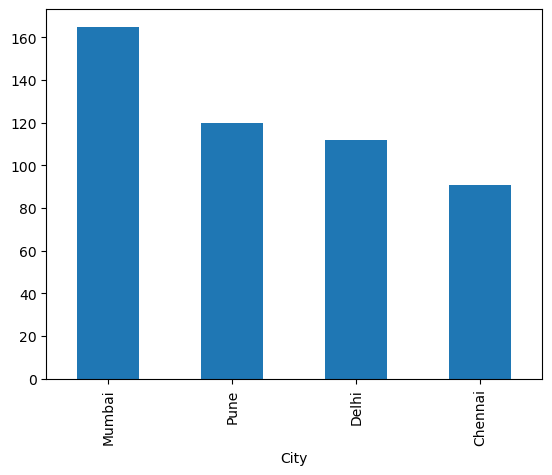

In [225]:
df.groupby("City")["Total"].mean().sort_values(ascending=False).plot(kind="bar")

In [233]:
df.drop("Age",axis=1,inplace=True)
df.drop(["City","Background","Total"],axis=1,inplace=True)

In [235]:
df

,Rank,Name,Gender,Python,Machine Learning,Grade
0,Rank 1,Ravi,0,89,95,A
1,Rank 2,Chandni,1,78,83,A
2,Rank 3,Gyanesh,0,70,80,A
3,Rank 4,Rahul,0,68,75,B
4,Rank 5,Kartik,0,60,70,B
5,Rank 6,Pratiksha,1,58,55,C
6,Rank 7,Maya,1,55,50,C
7,Rank 8,Shani,0,50,50,C
8,Rank 9,Neelam,1,50,47,C
9,Rank 10,Mangal,0,45,46,C


In [239]:
df.drop([0,1,4,7],inplace=True)

In [249]:
df.reset_index(drop=True,inplace=True)

In [251]:
df

,Rank,Name,Gender,Python,Machine Learning,Grade
0,Rank 3,Gyanesh,0,70,80,A
1,Rank 4,Rahul,0,68,75,B
2,Rank 6,Pratiksha,1,58,55,C
3,Rank 7,Maya,1,55,50,C
4,Rank 9,Neelam,1,50,47,C
5,Rank 10,Mangal,0,45,46,C
